# COVID-19 Growth
Adapted from https://nextjournal.com/mpd/covid-19-growth-by-state-us

In [2]:
# Standard libraries and options
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
#pd.describe_option('display')

In [4]:
# Download states by day as JSON. Skip this cell to avoid making more requests than needed.  
states_url = "https://covidtracking.com/api/states/daily"
r = requests.get(states_url)

In [5]:
# Convert JSON to pandas DataFrame.
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df.drop(['checkTimeEt', 'commercialScore', 'dataQualityGrade', 'dateChecked', 'dateModified', 'grade', 'hash', 'positiveScore', 'score'], axis = 1, inplace=True)
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,negativeRegularScore,negativeScore
0,2020-07-07,AK,"1,184.00","130,236.00",nan,25.00,nan,nan,nan,1.00,...,46,7621,131420,131420,7667,131420,1,0,0,0
1,2020-07-07,AL,"45,785.00","415,579.00",nan,"1,073.00","2,961.00",nan,858.00,nan,...,907,5362,461364,461364,6269,461364,26,47,0,0
2,2020-07-07,AR,"24,512.00","326,143.00",nan,369.00,"1,604.00",nan,nan,81.00,...,259,5428,350655,350655,5687,350655,0,29,0,0
3,2020-07-07,AS,0.00,696.00,nan,nan,nan,nan,nan,nan,...,0,0,696,696,0,696,0,0,0,0
4,2020-07-07,AZ,"105,094.00","523,703.00",nan,"3,356.00","5,272.00",869.00,nan,544.00,...,3653,7303,628797,628797,10956,628797,117,84,0,0


In [6]:
states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
positive,"6,946.00","21,717.92","48,216.08",0.00,453.50,"4,654.00","21,245.50","398,237.00"
negative,"6,803.00","190,521.51","400,883.56",0.00,"8,400.50","56,982.00","202,776.50","4,618,596.00"
pending,974.00,"1,162.68","6,166.92",0.00,13.25,101.50,477.00,"64,400.00"
hospitalizedCurrently,"4,362.00",945.41,"1,834.53",0.00,95.00,373.50,902.00,"18,825.00"
hospitalizedCumulative,"3,558.00","4,595.27","13,152.06",0.00,244.25,"1,082.00","3,588.25","89,995.00"
inIcuCurrently,"2,244.00",407.53,680.95,0.00,67.00,158.00,410.25,"5,225.00"
inIcuCumulative,939.00,669.53,581.35,6.00,186.50,497.00,996.00,"2,471.00"
onVentilatorCurrently,"1,957.00",202.03,311.28,0.00,26.00,86.00,220.00,"2,425.00"
onVentilatorCumulative,330.00,170.42,110.08,2.00,101.00,137.50,195.00,479.00
recovered,"3,974.00","9,356.05","16,804.68",2.00,551.00,"2,440.00","8,466.25","108,485.00"


In [7]:
states_df.info() # provides more info than states_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      6961 non-null   datetime64[ns]
 1   state                     6961 non-null   object        
 2   positive                  6946 non-null   float64       
 3   negative                  6803 non-null   float64       
 4   pending                   974 non-null    float64       
 5   hospitalizedCurrently     4362 non-null   float64       
 6   hospitalizedCumulative    3558 non-null   float64       
 7   inIcuCurrently            2244 non-null   float64       
 8   inIcuCumulative           939 non-null    float64       
 9   onVentilatorCurrently     1957 non-null   float64       
 10  onVentilatorCumulative    330 non-null    float64       
 11  recovered                 3974 non-null   float64       
 12  lastUpdateEt        

In [8]:
def get_std_formats (df, int_format = '{0:,.0f}', float_format =  '{:,.2f}', date_format = '{:%m/%d/%Y}') :

    dt_map = {'datetime64[ns]' : date_format, 'float64' : float_format, 'int64': int_format}

    return {n : dt_map[df.dtypes[n].name] for n in df.dtypes.index if df.dtypes[n].name in ([
    'datetime64[ns]', 'float64', 'int64'])}


In [9]:
states_fmts = get_std_formats(states_df)
states_df.tail().style.format(states_fmts)
#states_fmts

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,negativeRegularScore,negativeScore
6956,01/26/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
6957,01/25/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
6958,01/24/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
6959,01/23/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0
6960,01/22/2020,WA,2.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,None,nan,nan,nan,nan,nan,nan,53,0,0,2,2,0,2,0,0,0,0


# NJ Adjustment

The COVID Tracking Project [notes](https://covidtracking.com/data/state/new-jersey) that
"on June 25th, New Jersey reported 1854 probable deaths that occured in the past. This causes a perecived increase in the daily number of deaths."

We will subtract these for the time being, but it would be better to reallocate to past dates.



In [10]:
condition = (states_df['date']=='2020-06-25') & (states_df['state']=='NJ') 
adj_nj_incr = states_df.loc[condition]['deathIncrease'] - 1854
adj_nj_incr

706    23
Name: deathIncrease, dtype: int64

In [11]:
states_df.loc[condition, ['deathIncrease']] = adj_nj_incr
#states_df.loc[condition]

# Sort and add moving averages

In [12]:
# Sort values for moving average over state and date and calculate moving averages.
states_df.sort_values(by=['state', 'date'], inplace=True)
states_df['percentPositive'] = states_df['positiveIncrease'] / states_df['totalTestResultsIncrease']  
movingAvg7Day = lambda x : x.rolling(7).mean()
states_avg = states_df.groupby('state', group_keys=False)['deathIncrease', 'positiveIncrease','percentPositive', 'hospitalizedCurrently', 'hospitalizedIncrease'].apply(movingAvg7Day)
#states_avg.tail()

In [13]:
# add the calculated moving averages into states_df
states_df = states_df.join(states_avg, rsuffix='Average')
#states_df.tail(5)

In [14]:
case_cols = ['date','positiveIncrease', 'positiveIncreaseAverage', 'deathIncrease', 'deathIncreaseAverage', 'percentPositive', 'percentPositiveAverage', 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage', 'hospitalizedIncrease', 'hospitalizedIncreaseAverage']

nj_cases = states_df.loc[states_df['state']=='NJ', case_cols]

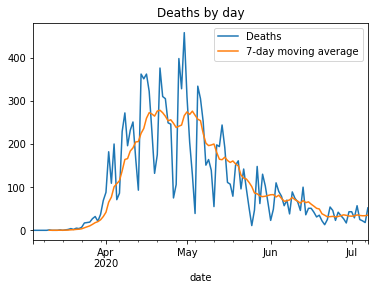

In [34]:
nj_cases.plot(x='date', y=['deathIncrease', 'deathIncreaseAverage'], title='NJ Deaths by day',label=['Deaths', '7-day moving average'])

In [16]:
nj_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
370,2020-07-01,261,290.86,43,32.71,0.01,0.01,"1,080.00","1,066.71",207,65.14
314,2020-07-02,428,308.57,29,33.57,0.02,0.01,"1,027.00","1,044.57",87,67.57
258,2020-07-03,386,308.29,57,35.71,0.02,0.02,"1,028.00","1,031.71",73,66.00
202,2020-07-04,291,308.57,25,34.43,0.01,0.02,983.00,"1,014.57",19,58.57
146,2020-07-05,369,317.14,22,33.71,0.01,0.01,917.00,"1,000.71",4,56.57
90,2020-07-06,209,334.14,18,33.86,0.01,0.02,861.00,984.00,0,55.71
34,2020-07-07,267,315.86,52,35.14,0.02,0.02,903.00,971.29,9,57.00


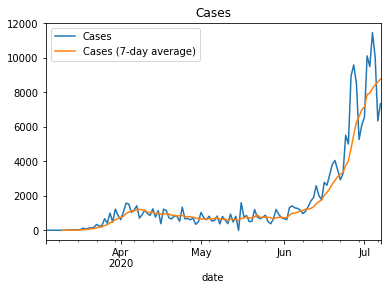

In [35]:
fl_cases = states_df.loc[states_df['state']=='FL', case_cols]
fl_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='FL Cases', label=['Cases', 'Cases (7-day average)'])

In [18]:
fl_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
346,2020-07-01,6563,"7,140.43",46,39.00,0.19,0.16,nan,nan,246,180.00
290,2020-07-02,10109,"7,869.71",68,42.14,0.20,0.18,nan,nan,329,198.00
234,2020-07-03,9488,"7,947.71",67,45.86,0.19,0.18,nan,nan,341,216.29
178,2020-07-04,11458,"8,215.29",18,44.86,0.18,0.18,nan,nan,245,229.71
122,2020-07-05,10059,"8,433.71",29,44.86,0.19,0.19,nan,nan,161,237.29
66,2020-07-06,6336,"8,586.57",48,47.71,0.19,0.19,nan,nan,151,243.00
10,2020-07-07,7347,"8,765.71",63,48.43,0.21,0.19,nan,nan,381,264.86


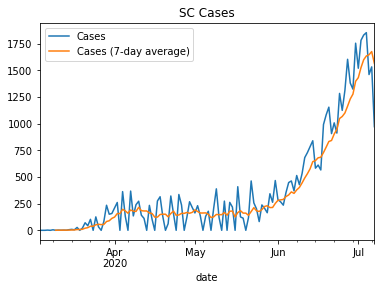

In [36]:
sc_cases = states_df.loc[states_df['state']=='SC', case_cols]
sc_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='SC Cases', label=['Cases', 'Cases (7-day average)'])

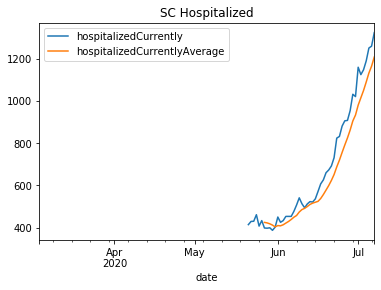

In [20]:
sc_cases.plot(x='date', y=[ 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage'], title='SC Hospitalized')

In [21]:
sc_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
380,2020-07-01,1520,"1,431.71",27,11.86,0.16,0.26,"1,160.00",980.29,0,68.14
324,2020-07-02,1782,"1,525.57",18,13.00,0.15,0.27,"1,125.00","1,015.14",0,68.14
268,2020-07-03,1831,"1,599.57",9,14.14,0.24,0.16,"1,148.00","1,049.71",28,37.14
212,2020-07-04,1854,"1,635.29",20,14.57,0.16,0.17,"1,190.00","1,090.00",0,37.14
156,2020-07-05,1461,"1,646.71",7,14.86,0.14,0.17,"1,251.00","1,132.43",0,37.14
100,2020-07-06,1533,"1,676.57",7,15.29,0.17,0.17,"1,260.00","1,165.00",0,37.14
44,2020-07-07,972,"1,564.71",19,15.29,0.18,0.17,"1,324.00","1,208.29",208,33.71


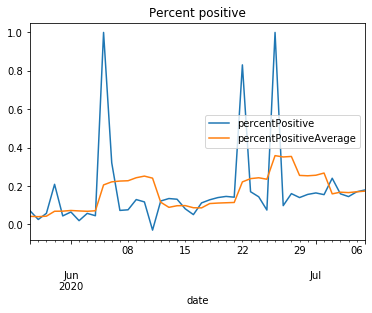

In [22]:
sc_cases[sc_cases['date']>= '2020-05-27'].plot(x='date', y=[ 'percentPositive', 'percentPositiveAverage'], title='Percent positive')

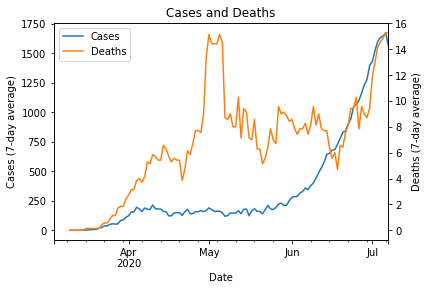

In [37]:
ax = sc_cases.plot(x='date', y='positiveIncreaseAverage', title='Cases and Deaths', label='Cases')
sc_cases.plot(x='date', y='deathIncreaseAverage', ax=ax, secondary_y=True, label='Deaths', mark_right=False)
ax.set(xlabel="Date", ylabel="Cases (7-day average)")
_ = ax.right_ax.set_ylabel('Deaths (7-day average)')


# Population adjustment

Latest census CSV contains FIPS code for state and 2019 estimates.

`http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#`

Source:[State Population Totals and Components of Change: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage)

In [24]:
pop_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#'
pop_df = pd.read_csv(pop_url, dtype={'STATE': 'object'})
# We only want the state-level rows (40) and 2019 data. 
pop_df = pop_df.loc[(pop_df['SUMLEV'] == 40), ['STATE', 'NAME','POPESTIMATE2019']]

# rename state to fips for merge
pop_df.columns = ['fips', 'stateName', 'population']


In [25]:
# Get the latest date in the data set.
latest = states_df['date'].max()
latest

Timestamp('2020-07-07 00:00:00')

In [26]:
#  %%timeit=2.49 ms 
latest_df = states_df.loc[states_df['date'] == latest]

In [27]:
latest_df = latest_df.merge(pop_df, on=['fips'])

In [28]:
latest_df['positiveAvgPerCap'] = latest_df['positiveIncreaseAverage'] / (latest_df['population'] / 1000000)
latest_df['deathAvgPerCap'] = latest_df['deathIncreaseAverage'] / (latest_df['population'] / 1000000)
latest_df['hospitalizedPerCap'] = latest_df['hospitalizedCurrentlyAverage'] / (latest_df['population'] / 1000000)
latest_df['hospIncrPerCap'] = latest_df['hospitalizedIncreaseAverage'] / (latest_df['population'] / 1000000)
#latest_df.head(5)

In [29]:
latest_df[['stateName','positiveAvgPerCap', 'population', 'positiveIncreaseAverage', 'positiveIncrease']
    ].nlargest(10, 'positiveAvgPerCap').sort_values('positiveAvgPerCap', ascending=False)

,stateName,positiveAvgPerCap,population,positiveIncreaseAverage,positiveIncrease
3,Arizona,507.92,7278717,"3,697.00",3653
9,Florida,408.13,21477737,"8,765.71",7347
18,Louisiana,312.46,4648794,"1,452.57",1936
41,South Carolina,303.90,5148714,"1,564.71",972
10,Georgia,258.05,10617423,"2,739.86",3406
44,Texas,249.29,28995881,"7,228.43",10028
33,Nevada,247.16,3080156,761.29,876
25,Mississippi,238.42,2976149,709.57,957
1,Alabama,225.51,4903185,"1,105.71",907
43,Tennessee,209.29,6829174,"1,429.29",1359


In [30]:
latest_df[['stateName','positiveIncreaseAverage', 'positiveIncrease']
         ].nlargest(20, 'positiveIncreaseAverage').sort_values('positiveIncreaseAverage', ascending=False)

,stateName,positiveIncreaseAverage,positiveIncrease
9,Florida,"8,765.71",7347
4,California,"7,836.71",6090
44,Texas,"7,228.43",10028
3,Arizona,"3,697.00",3653
10,Georgia,"2,739.86",3406
27,North Carolina,"1,600.71",1346
41,South Carolina,"1,564.71",972
18,Louisiana,"1,452.57",1936
43,Tennessee,"1,429.29",1359
1,Alabama,"1,105.71",907


In [31]:
latest_df[['stateName','hospitalizedPerCap', 'population', 'hospitalizedCurrently']
         ].nlargest(20, 'hospitalizedPerCap').sort_values('hospitalizedPerCap', ascending=False)

,stateName,hospitalizedPerCap,population,hospitalizedCurrently
3,Arizona,425.70,7278717,"3,356.00"
25,Mississippi,286.37,2976149,885.00
44,Texas,275.87,28995881,"9,286.00"
33,Nevada,236.63,3080156,849.00
41,South Carolina,234.68,5148714,"1,324.00"
18,Louisiana,192.31,4648794,"1,025.00"
1,Alabama,181.40,4903185,"1,073.00"
4,California,178.85,39512223,"7,499.00"
10,Georgia,167.90,10617423,"2,096.00"
7,District of Columbia,143.52,705749,90.00


In [32]:

hosp_df = latest_df[['stateName','hospIncrPerCap', 'population', 'hospitalizedIncreaseAverage', 'hospitalizedIncrease']
         ].nlargest(20, 'hospIncrPerCap').sort_values('hospIncrPerCap', ascending=False)
hosp_df = hosp_df.rename({'stateName' : 'State',  'hospIncrPerCap' : 'Hospitalizations per mil., 7-day avg.' ,
               'population' : 'Population', 'hospitalizedIncreaseAverage' : 'Hospitalizations, 7-day avg.', 
               'hospitalizedIncrease' : 'Hospitalizations'}, axis=1)
hosp_df.index = np.arange(1, len(hosp_df) + 1)

hosp_df.style.\
    format(get_std_formats(hosp_df)).\
    set_properties(subset=['State'], **{'text-align': 'left'}).\
    set_table_styles([dict(selector="th",props=[('max-width', '10em'), ('vertical-align' , 'bottom')]),
                     dict(selector="thead tr:first-of-type th:nth-of-type(2)",props=[('text-align', 'left')])])
#hosp_df.to_html()


,State,"Hospitalizations per mil., 7-day avg.",Population,"Hospitalizations, 7-day avg.",Hospitalizations
1,Georgia,15.81,"10,617,423",167.86,307
2,Virginia,13.94,"8,535,519",119.00,223
3,Florida,12.33,"21,477,737",264.86,381
4,New Mexico,10.70,"2,096,829",22.43,27
5,Arizona,10.52,"7,278,717",76.57,84
6,Utah,9.31,"3,205,958",29.86,49
7,Arkansas,9.04,"3,017,804",27.29,29
8,Oklahoma,7.98,"3,956,971",31.57,52
9,Mississippi,7.63,"2,976,149",22.71,35
10,Ohio,6.65,"11,689,100",77.71,134
